In [ ]:
# 导入必要的库
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [80]:
# 检查数据集是否存在
def check_data(path: str):
    if not os.path.exists(path):
        print("路径不存在")
    else:
        print("路径存在")
data_path="weatherHistory.csv"
check_data(data_path)

# 加载数据集
df=pd.read_csv(data_path)
df['Formatted Date'] = df['Formatted Date'].str[:-6]#  去掉后五个字符
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')# 将 'Formatted Date' 列转换为日期时间类型
df["Summary"]=df["Summary"].astype("category")
df["Precip Type"]=df["Precip Type"].astype("category")
df["Daily Summary"]=df["Daily Summary"].astype("category")
print(df.dtypes)
df.head()

路径存在
Formatted Date              datetime64[ns]
Summary                           category
Precip Type                       category
Temperature (C)                    float64
Apparent Temperature (C)           float64
Humidity                           float64
Wind Speed (km/h)                  float64
Wind Bearing (degrees)             float64
Visibility (km)                    float64
Pressure (millibars)               float64
Daily Summary                     category
dtype: object


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,NaT,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66,Mostly cloudy throughout the day.
1,NaT,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15,Mostly cloudy throughout the day.
2,NaT,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87,Mostly cloudy throughout the day.
3,NaT,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56,Mostly cloudy throughout the day.
4,NaT,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98,Mostly cloudy throughout the day.


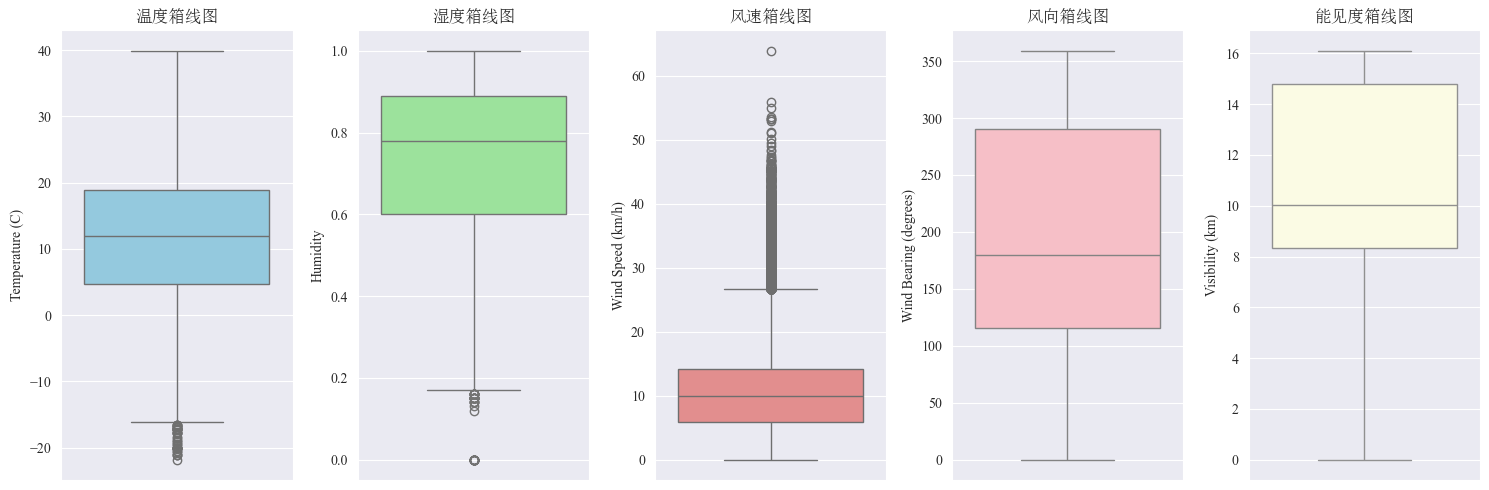

Total number of rows: 96429
Total number of columns: 11
Unique values are:
 Formatted Date                 0
Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Pressure (millibars)        4979
Daily Summary                214
dtype: int64


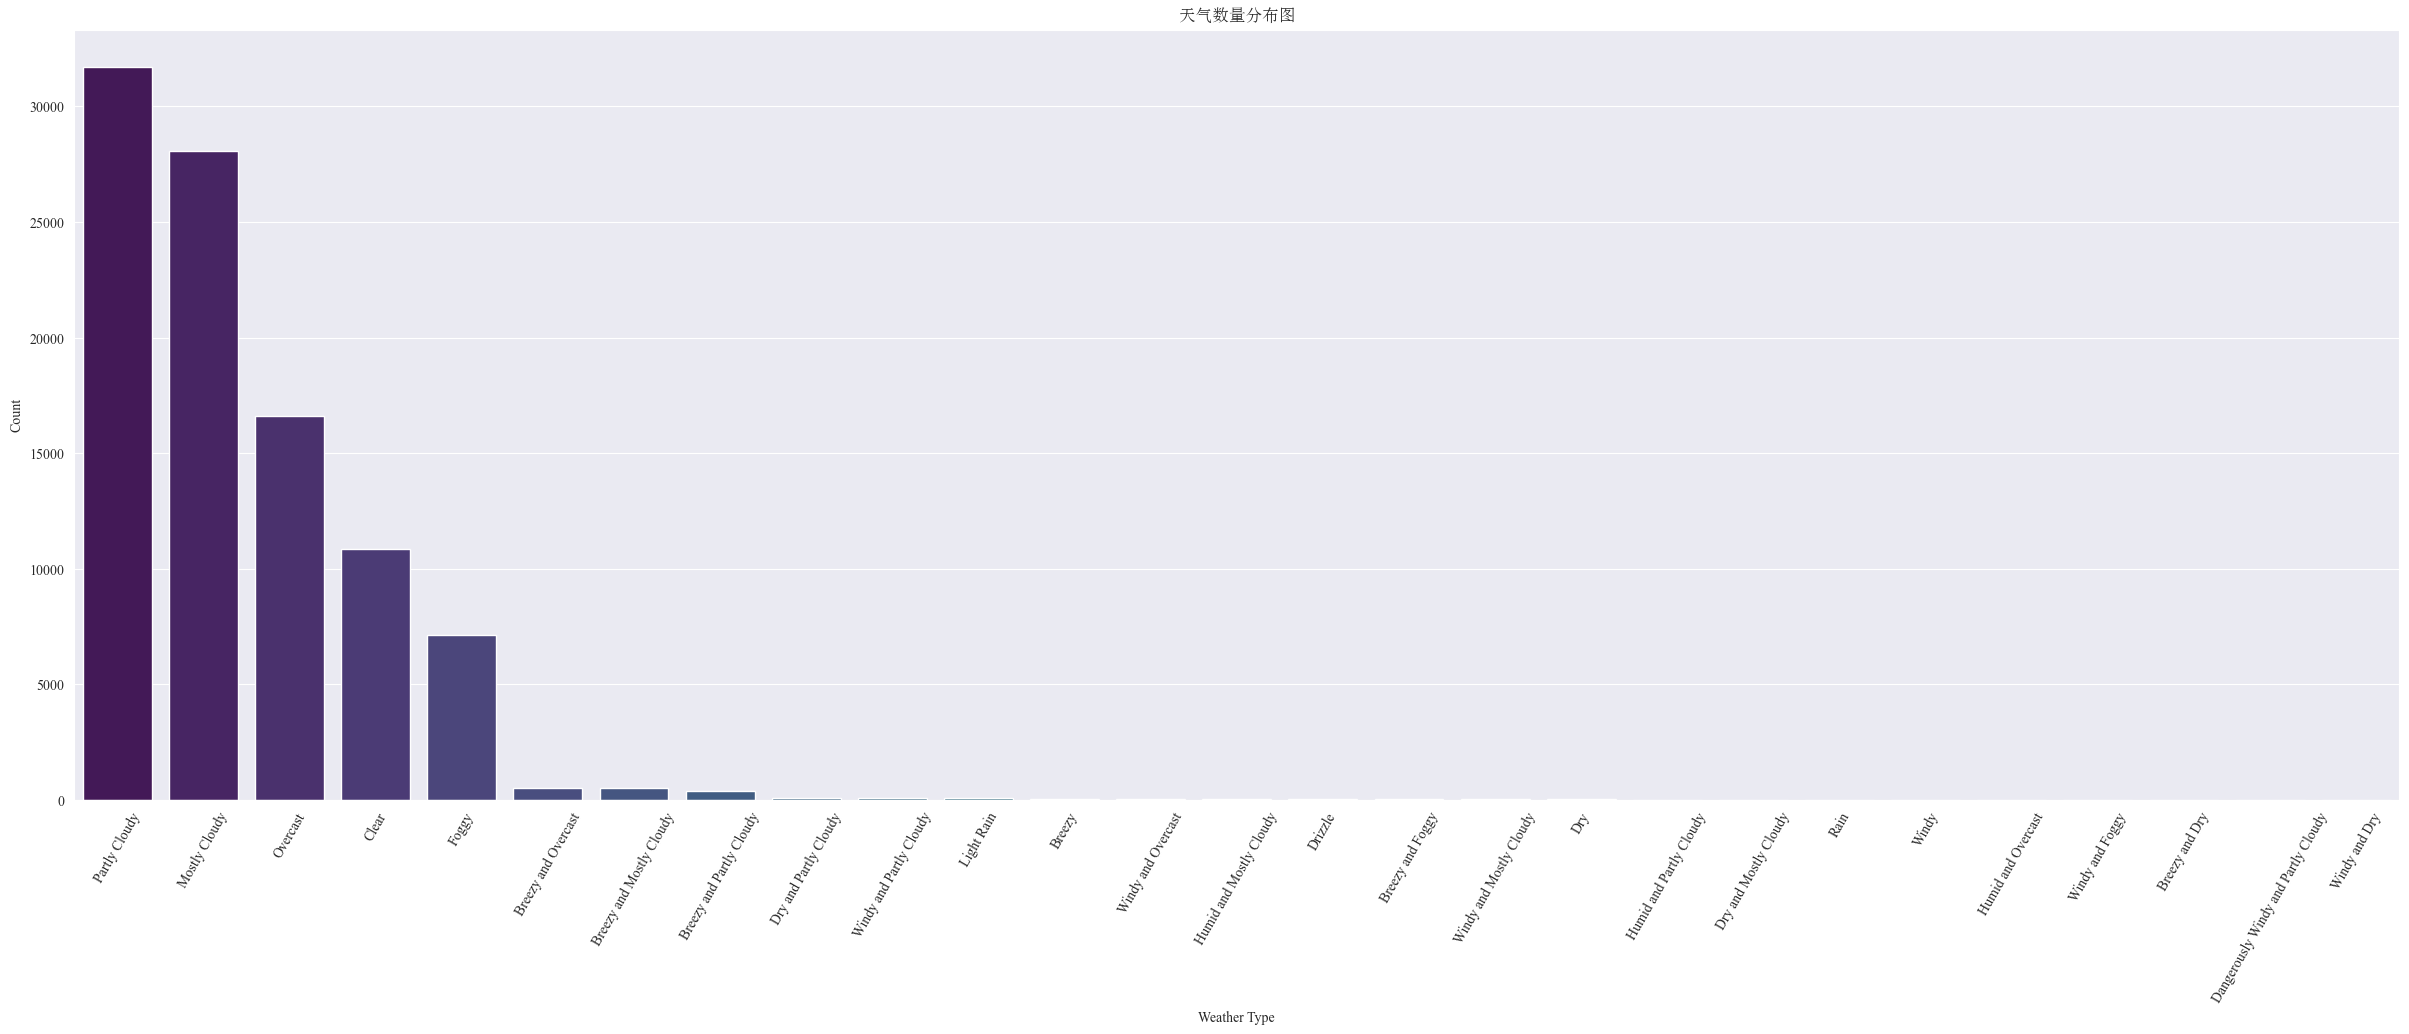

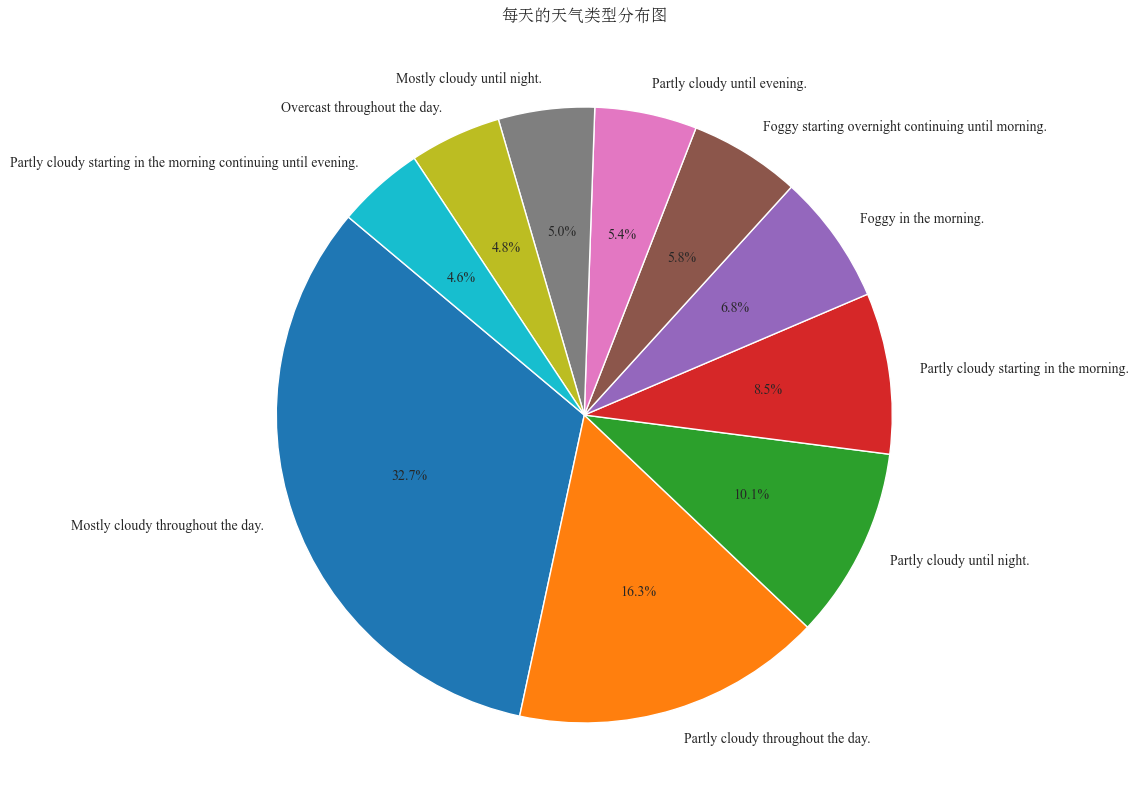

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')


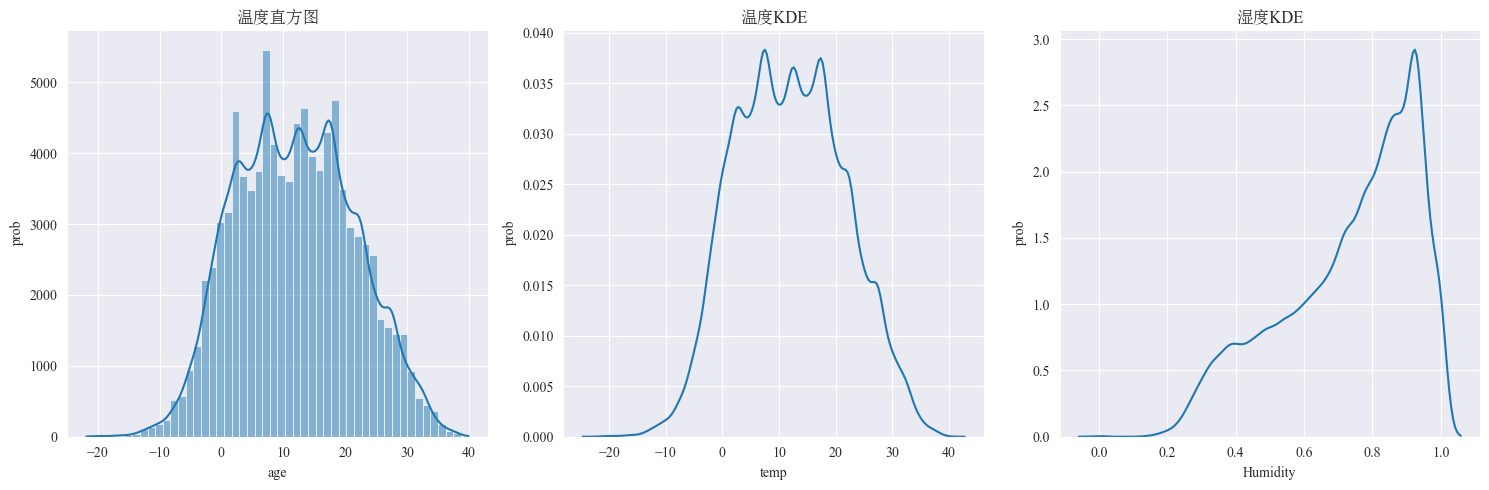

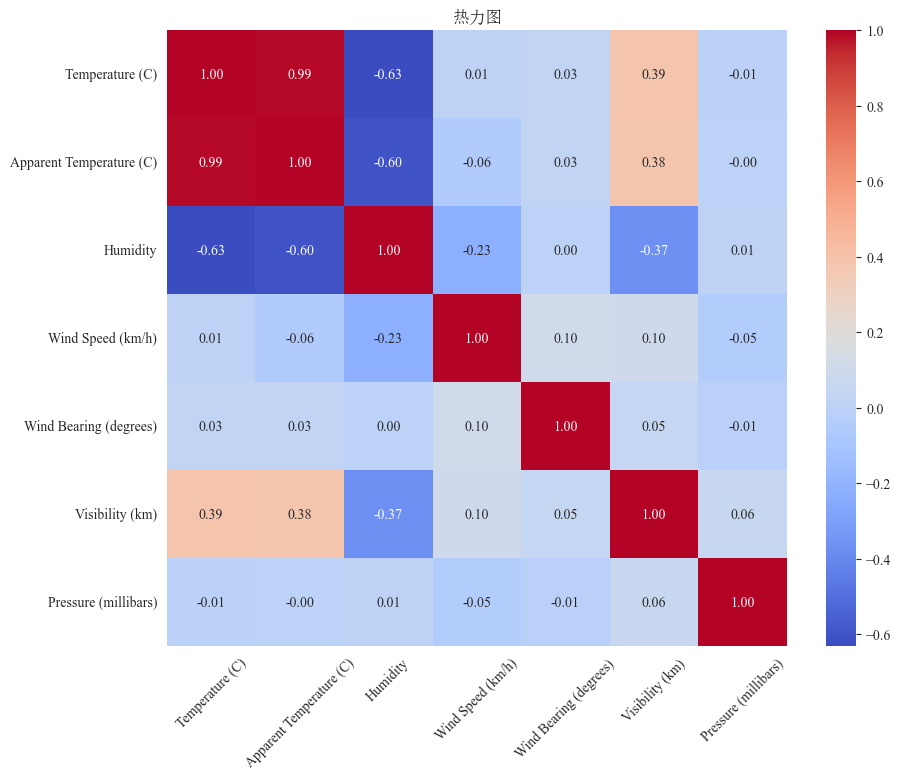

In [82]:
"""画图"""
plt.rcParams['font.family'] = ["Times New Roman", 'SimSun']
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# 箱线图
# 绘制第一个箱线图并添加统计值标签
sns.boxplot(y=df['Temperature (C)'], ax=axs[0],color='skyblue')
axs[0].set_title('温度箱线图')
# 绘制第二个箱线图并添加统计值标签
sns.boxplot(y=df['Humidity'], ax=axs[1],color='lightgreen')
axs[1].set_title('湿度箱线图')
# 绘制第三个箱线图并添加统计值标签
sns.boxplot(y=df['Wind Speed (km/h)'], ax=axs[2],color='lightcoral')
axs[2].set_title('风速箱线图')
# 绘制第四个箱线图并添加统计值标签
sns.boxplot(y=df['Wind Bearing (degrees)'], ax=axs[3],color='lightpink')
axs[3].set_title('风向箱线图')
# 绘制第五个箱线图并添加统计值标签
sns.boxplot(y=df['Visibility (km)'], ax=axs[4],color='lightyellow')
axs[4].set_title('能见度箱线图')
# 调整布局
plt.tight_layout()
plt.show()
    
# 天气数量分布图-柱状图
df_weather_row_count, df_weather_column_count=df.shape
print('Total number of rows:', df_weather_row_count) # 行数
print('Total number of columns:', df_weather_column_count) # 列数
print ("Unique values are:\n",df.nunique()) # 查看每列的唯一值
Summary_Weather=df["Summary"].value_counts().reset_index() # 查看天气类型的分布
Summary_Weather.columns=["Weather Type","Count"] # 重命名列名
# Summary_Weather # 显示天气类型的分布
# 绘制柱状图，从高到低排序，标记数字
plt.figure(figsize=(30,10))
sns.barplot(x="Weather Type",y="Count",data=Summary_Weather,order=Summary_Weather["Weather Type"],palette="viridis") # order=Summary_Weather["Weather Type"]按照天气类型排序
plt.xticks(rotation=60)
plt.title('天气数量分布图')
plt.show()

# 每天的天气类型分布图-饼图
Daily_Summary_Weather=df["Daily Summary"].value_counts().reset_index() # 查看每天的天气类型分布
Daily_Summary_Weather.columns=["Daily Weather Type","Count"] # 重命名列名
# Daily_Summary_Weather # 显示每天的天气类型分布
# 绘制饼图,只取前10个，别的划分为其余，带箭头
plt.figure(figsize=(20,10))
plt.pie(Daily_Summary_Weather["Count"][:10],labels=Daily_Summary_Weather["Daily Weather Type"][:10],autopct='%1.1f%%',startangle=140)
plt.title('每天的天气类型分布图')
plt.show()

# 直方图
print(df.columns)
# 创建子图
fig,axes = plt.subplots(1, 3, figsize=(15, 5))
# 绘制直方图和 KDE,kde是核密度估计
sns.histplot(data=df, x='Temperature (C)', kde=True, bins=50, ax=axes[0])  # bins
axes[0].set_title('温度直方图') 
axes[0].set_xlabel('age')
axes[0].set_ylabel('prob')
# 按地区绘制 KDE
sns.kdeplot(data=df, x='Temperature (C)', common_norm=False, ax=axes[1])
axes[1].set_title('温度KDE')
axes[1].set_xlabel('temp')
axes[1].set_ylabel('prob')
# 按作物类型绘制 KDE
sns.kdeplot(data=df, x='Humidity',  common_norm=False, ax=axes[2])
axes[2].set_title('湿度KDE')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('prob')
# 显示图形
plt.tight_layout()
plt.show()

# Correlation heatmap 
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
# 设置横坐标倾斜
plt.xticks(rotation=45)
plt.title('热力图')
plt.show()

In [ ]:
# 查看缺失值
wt_missing =df.isna().sum()
wt_missing 

In [ ]:
# 计算缺失值的百分比
t_cells = np.product(df.shape)
t_missing = wt_missing.sum()
percent_missing = (t_missing/t_cells) * 100
print(percent_missing)

In [ ]:
# 删除缺失值
df['Precip Type'].fillna(df['Precip Type'].value_counts().index[0],inplace=True)
df.isna().sum()


KeyboardInterrupt



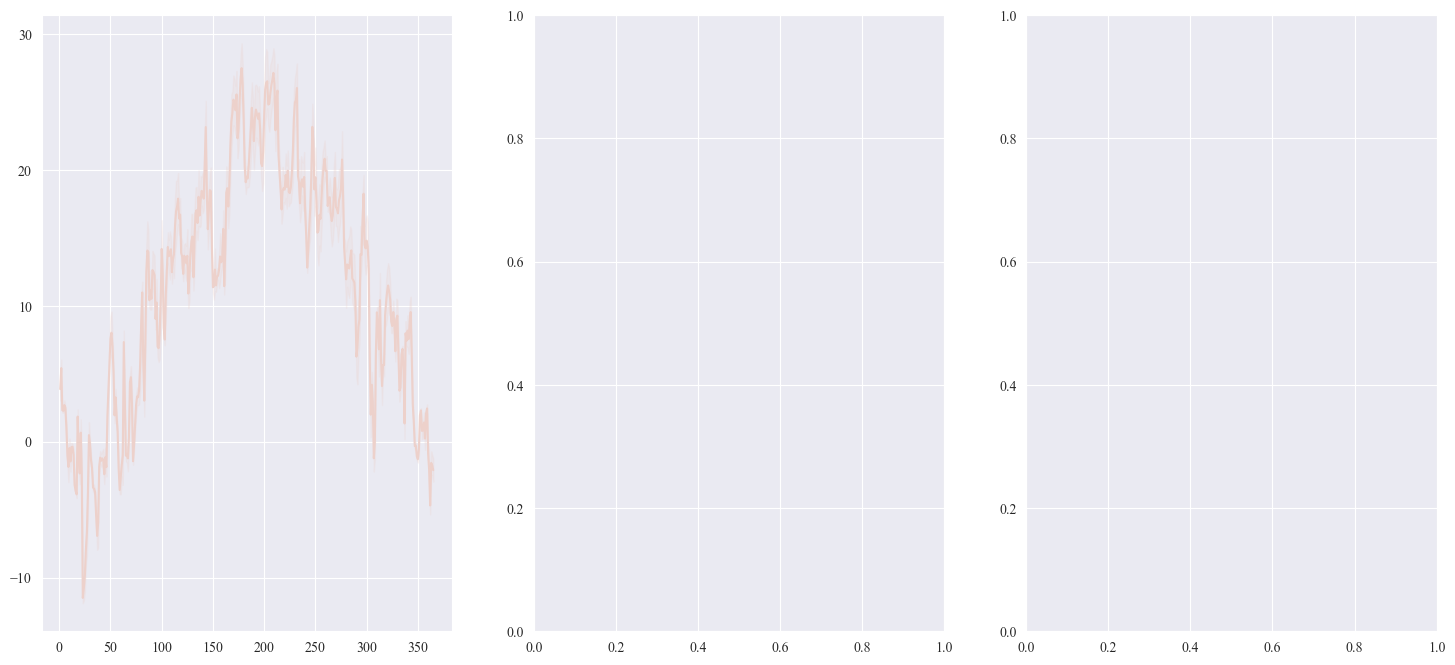

In [77]:
df['day_of_year']=df['Formatted Date'].dt.dayofyear
df['year']=df['Formatted Date'].dt.year
numeric_cols=['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']
df_daily = df.groupby(df['Formatted Date'].dt.date)[numeric_cols].mean().reset_index()
df_daily['day_of_year'] = pd.to_datetime(df_daily['Formatted Date']).dt.dayofyear

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
# 温度折线图，一年一条折线，一条折线上有365个点，每个点代表一天的平均温度
sns.lineplot(data=df,x='day_of_year',y='Temperature (C)',hue='year',ax=axes[0])
axes[0].set_title('每年的气温变化情况')
axes[0].set_xlabel('day')
axes[0].set_ylabel('℃')
axes[0].legend(title='年份')

# 湿度折线图，一年一条折线，一条折线上有365个点，每个点代表一天的平均温度
sns.lineplot(data=df,x='day_of_year',y='Hi (C)',hue='year',ax=axes[0])
axes[0].set_title('每年的气温变化情况')
axes[0].set_xlabel('day')
axes[0].set_ylabel('℃')
axes[0].legend(title='年份')

df.head()